<a href="https://colab.research.google.com/github/SebastienLiger/Portfolio-Finance/blob/Finance/Fronti%C3%A8re_Efficiente_Equity_Dividend_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import re
from io import StringIO
from datetime import datetime, timedelta
import requests
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
# HISTORICAL PRICES BY COMPANY FROM 2020-01-01 TO 2024-01-01

start_date = "2020-01-01"
end_date = "2024-01-01"

symbols = ["601398.SS", "VALE", "EC", "GBOOY", "XOM",
    "BIP", "ASX", "ARCC", "CIVI", "INSW", "WU", "MPLX", "MO", "NEP", "ABBV", "HESM", "RITM", "ENB", "KMI", "MAIN", "NS", "HTGC", "KRO", "LPG",
    "AMUN.PA", "BMW.DE", "0RSP.IL", "ACA.PA", "EDP.LS", "TTE.PA", "ALV.DE", "TLX.DE", "0QAL.IL", "HF6.F", "BMT.F", "BNP.PA", "PFE", "VODI.F", "ISP.MI", "CS.PA" ]

tickers_to_names = {
    "601398.SS": "Industrial and Commercial Bank of China",
    "VALE": "Vale S.A",
    "EC": "Ecopetrol S.A",
    "GBOOY": "Grupo Financiero Banorte",
    "XOM": "Exxon Mobil Corp",
    "BIP": "Brookfield Infrastructure",
    "ASX": "ASE Technology Holding Co",
    "ARCC": "Ares Capital",
    "CIVI": "Civitas Resources",
    "INSW": "International Seaways",
    "WU": "Western Union",
    "MPLX": "MPLX LP",
    "MO": "Altria Group Inc",
    "NEP": "NextEra Energy Partners",
    "ABBV": "AbbVie",
    "HESM": "Hess Midstream Partners",
    "RITM": "Rithm Capital",
    "ENB": "Enbridge Inc",
    "MAIN": "Main Street Capital Corp",
    "KMI": "Kinder Morgan Inc",
    "NS": "NuSTAR Energy L.P",
    "HTGC": "Hercules Capital Inc",
    "KRO": "Kronos Worldwide Inc",
    "LPG": "Dorian LPG Ltd",
    "AMUN.PA": "Amundi",
    "BMW.DE": "BMW",
    "0RSP.IL": "ALD SA",
    "ACA.PA": "Crédit Agricole",
    "EDP.LS": "EDP Energias de Portugal",
    "TTE.PA": "Total",
    "ALV.DE": "Allianz",
    "TLX.DE": "Talanx AG",
    "0QAL.IL": "Telefonica Deutschland Holding",
    "HF6.F": "Frontline",
    "BMT.F": "British American Tobacco p.l.c",
    "BNP.PA": "BNP Paribas",
    "PFE": "Pfizer Inc",
    "VODI.F": "Vodafone Group",
    "ISP.MI": "Intesa Sanpaolo S.p.A",
    "CS.PA": "AXA"
}

# Téléchargement des données
stocks_df = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Renommer les colonnes du DataFrame selon les noms des sociétés
stocks_df_renamed = stocks_df.rename(columns=tickers_to_names)

# Appliquer le formatage pour afficher seulement 2 décimales et ajouter le signe euros
formatted_df_euros = stocks_df_renamed.applymap(lambda x: f"€{x:.2f}")

# Affichage du DataFrame formaté avec le signe euros et deux décimales
formatted_df_euros

[*********************100%%**********************]  40 of 40 completed


Ticker,Telefonica Deutschland Holding,ALD SA,Industrial and Commercial Bank of China,AbbVie,Crédit Agricole,Allianz,Amundi,Ares Capital,ASE Technology Holding Co,Brookfield Infrastructure,...,NextEra Energy Partners,NuSTAR Energy L.P,Pfizer Inc,Rithm Capital,Talanx AG,Total,Vale S.A,Vodafone Group,Western Union,Exxon Mobil Corp
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,€2.12,€11.09,€4.74,€74.20,€10.25,€179.46,€56.00,€12.64,€4.48,€24.92,...,€42.20,€17.21,€31.34,€11.27,€37.29,€37.53,€9.14,€1.29,€20.91,€57.00
2020-01-03,€2.11,€11.11,€4.75,€73.49,€10.19,€177.47,€55.96,€12.64,€4.36,€25.02,...,€42.14,€17.26,€31.17,€11.18,€37.07,€37.96,€9.03,€1.29,€20.84,€56.54
2020-01-06,€2.14,€10.75,€4.74,€74.07,€10.09,€176.38,€54.26,€12.66,€4.23,€25.10,...,€42.12,€17.41,€31.13,€11.23,€36.95,€38.51,€8.93,€1.28,€20.64,€56.97
2020-01-07,€2.18,€10.65,€4.77,€73.65,€10.06,€176.78,€54.78,€12.63,€4.21,€24.97,...,€42.20,€17.54,€31.03,€11.23,€37.62,€38.26,€8.99,€1.28,€20.74,€56.51
2020-01-08,€2.15,€11.01,€4.69,€74.17,€10.11,€176.86,€54.74,€12.69,€4.17,€24.97,...,€42.06,€17.50,€31.27,€11.25,€37.49,€38.36,€8.98,€1.29,€20.92,€55.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,€nan,€nan,€4.80,€nan,€nan,€nan,€nan,€nan,€nan,€nan,...,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan,€nan
2023-12-26,€nan,€nan,€4.82,€153.16,€nan,€nan,€nan,€19.94,€9.39,€31.39,...,€29.71,€18.05,€27.99,€10.86,€nan,€nan,€15.24,€nan,€11.75,€101.20
2023-12-27,€2.36,€6.51,€4.83,€153.41,€12.91,€241.70,€61.55,€20.05,€9.43,€31.32,...,€29.64,€18.41,€28.19,€10.82,€64.95,€61.72,€15.32,€0.79,€11.75,€100.72


In [3]:
# HISTORICAL ANNUALIZED RETURN BY COMPANY FROM 2020-01-01 TO 2024-01-01

# Calculer les rendements quotidiens des actions
daily_returns = stocks_df_renamed.pct_change()

# Calculer les rendements annuels moyens des actions
annual_return = (daily_returns.mean() * 250) + 1  # Multiplier par 250 jours ouvrables

# Calculer la covariance des rendements quotidiens et annuels
cov_daily = daily_returns.cov()
cov_annual = cov_daily * 250

# Création d'un tableau pour afficher les rendements annuels moyens avec les noms des sociétés
annual_return_table = pd.DataFrame(annual_return, columns=["Rendement Annuel"])
annual_return_table

,Rendement Annuel
Ticker,
Telefonica Deutschland Holding,1.075292
ALD SA,0.938454
Industrial and Commercial Bank of China,1.012480
AbbVie,1.205039
Crédit Agricole,1.114960
Allianz,1.109963
Amundi,1.073082
Ares Capital,1.173728
ASE Technology Holding Co,1.262299


In [4]:
# PORTFOLIO SIMULATION (RETURN, VOLATILITY, SHARPE RATIO, ALLOCATION)

num_portfolios = 10000  # Nombre de portefeuilles à simuler
num_stocks = len(symbols)  # Nombre d'actions dans votre portefeuille

treasuries_us = yf.Ticker("^TNX")

# Essayez de récupérer les données sur une plus grande période pour s'assurer d'obtenir la dernière donnée
current_data_risk_free_rate = treasuries_us.history(period="1mo")  # Changement de '1d' à '1mo'

# Vérifiez si des données de prix sont disponibles et récupérez la dernière donnée non nulle
if not current_data_risk_free_rate.empty and not current_data_risk_free_rate["Close"].dropna().empty:
    current_price_risk_free_rate = current_data_risk_free_rate["Close"].dropna().iloc[-1]
    current_price_RFR = current_price_risk_free_rate / 100
else:
    # Si aucune donnée n'est disponible, définir une valeur par défaut ou gérer l'erreur
    print("Aucune donnée de taux sans risque disponible pour ^TNX.")
    # Utiliser une valeur de taux sans risque par défaut
    current_price_RFR = 0.03

# Containers pour les résultats
portfolio_returns = []
portfolio_volatility = []
sharpe_ratios = []
stock_weights = []

for _ in range(num_portfolios):
    # Générer des poids aléatoires pour chaque action
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)  # Normaliser les poids pour qu'ils somment à 1
    stock_weights.append(weights)

    # Calculer le rendement et la volatilité du portefeuille pour les poids générés
    returns = np.sum(weights * daily_returns.mean()) * 252
    volatility = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))

    # Calculer le ratio de Sharpe
    sharpe_ratio = (returns - current_price_RFR) / volatility

    # Ajouter les résultats aux listes
    portfolio_returns.append(returns)
    portfolio_volatility.append(volatility)
    sharpe_ratios.append(sharpe_ratio)

# Créer un DataFrame avec les résultats
portfolio_data = {
    'Returns': portfolio_returns,
    'Volatility': portfolio_volatility,
    'Sharpe Ratio': sharpe_ratios
}

# Ajouter les poids des actions au DataFrame en utilisant les noms des sociétés
for counter, symbol in enumerate(symbols):
    # Utiliser tickers_to_names pour obtenir le nom de la société à partir du ticker
    company_name = tickers_to_names.get(symbol, symbol)  # Garde le symbole si le nom n'est pas trouvé
    portfolio_data[company_name + ' Weight'] = [weights[counter] for weights in stock_weights]

df = pd.DataFrame(portfolio_data)
df

,Returns,Volatility,Sharpe Ratio,Industrial and Commercial Bank of China Weight,Vale S.A Weight,Ecopetrol S.A Weight,Grupo Financiero Banorte Weight,Exxon Mobil Corp Weight,Brookfield Infrastructure Weight,ASE Technology Holding Co Weight,...,Allianz Weight,Talanx AG Weight,Telefonica Deutschland Holding Weight,Frontline Weight,British American Tobacco p.l.c Weight,BNP Paribas Weight,Pfizer Inc Weight,Vodafone Group Weight,Intesa Sanpaolo S.p.A Weight,AXA Weight
0,0.165861,0.222092,0.558061,0.017800,0.034622,0.011577,0.042482,0.020773,0.005389,0.024984,...,0.033654,0.004355,0.025953,0.020097,0.037242,0.030548,0.001153,0.018376,0.006343,0.000554
1,0.149672,0.216514,0.497669,0.034237,0.007611,0.046846,0.042999,0.011879,0.033245,0.049550,...,0.044070,0.004992,0.018598,0.003230,0.001950,0.029175,0.013598,0.005383,0.042375,0.055218
2,0.179828,0.224282,0.614889,0.029539,0.016057,0.025243,0.009484,0.025612,0.031001,0.021229,...,0.012133,0.010169,0.049566,0.048730,0.027905,0.037402,0.049455,0.003525,0.001121,0.030852
3,0.163054,0.233087,0.519697,0.035509,0.040988,0.013630,0.042454,0.016382,0.013326,0.007164,...,0.026041,0.041128,0.015355,0.033245,0.021217,0.021858,0.037059,0.034666,0.014100,0.014067
4,0.142320,0.220956,0.454387,0.025339,0.036200,0.029438,0.031078,0.043981,0.016033,0.028104,...,0.003478,0.004484,0.045668,0.038622,0.008728,0.018510,0.039735,0.026485,0.039367,0.035576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.130342,0.225098,0.392817,0.037318,0.050614,0.024438,0.043785,0.037314,0.053365,0.020409,...,0.032207,0.046298,0.004060,0.024995,0.017636,0.029634,0.005598,0.026683,0.011974,0.023587
9996,0.173021,0.224693,0.583466,0.006228,0.023891,0.040980,0.036474,0.017898,0.031236,0.035606,...,0.044907,0.016258,0.018791,0.044248,0.025483,0.026998,0.020629,0.020788,0.012135,0.011113
9997,0.171234,0.239140,0.540748,0.005732,0.014050,0.014977,0.010444,0.027129,0.033011,0.001725,...,0.024919,0.033398,0.024259,0.035561,0.038602,0.028811,0.047730,0.048447,0.035841,0.038297
9998,0.170198,0.243837,0.526079,0.004639,0.043212,0.021384,0.016656,0.001188,0.022044,0.013851,...,0.020810,0.048159,0.026705,0.027886,0.040488,0.018154,0.037694,0.004774,0.005865,0.011956


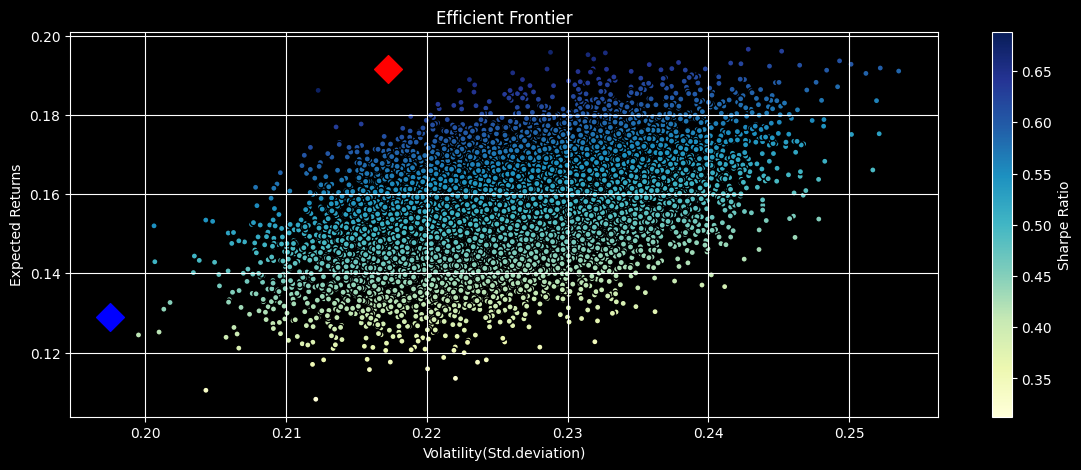

╒════════════════════════════════════════════════╤════════════════════════════════╤════════════════════════════╕
│                                                │ Minimum Risk Adjusted Values   │ Max Risk Adjusted Values   │
╞════════════════════════════════════════════════╪════════════════════════════════╪════════════════════════════╡
│ Returns                                        │ 12.91%                         │ 19.15%                     │
├────────────────────────────────────────────────┼────────────────────────────────┼────────────────────────────┤
│ Volatility                                     │ 19.75%                         │ 21.72%                     │
├────────────────────────────────────────────────┼────────────────────────────────┼────────────────────────────┤
│ Sharpe Ratio                                   │ 44.13%                         │ 68.85%                     │
├────────────────────────────────────────────────┼────────────────────────────────┼─────────────

In [5]:
# FINAL ALLOCATION IN ORDER TO DECREASE VOLATILITY OR INCREASE EXPECTED RETURN

min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

max_sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

plt.style.use("dark_background")
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='YlGnBu', edgecolors='black', figsize=(14, 5), grid=True)
plt.scatter(x=max_sharpe_portfolio['Volatility'], y=max_sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200)
plt.xlabel('Volatility(Std.deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

r_ef = pd.concat([min_variance_port.T, max_sharpe_portfolio.T], axis=1)
r_ef.columns = ["Minimum Risk Adjusted Values", "Max Risk Adjusted Values"]

# Formatage des données
def format_value(x):
    if isinstance(x, float):
        # Pour le ratio de Sharpe, format avec 3 décimales
        if x > 1:
            return f"{x:.3f}"
        # Pour les poids, conversion en pourcentage avec 2 décimales
        else:
            return f"{x*100:.2f}%"
    return x

r_ef = r_ef.applymap(format_value)
from tabulate import tabulate

print(tabulate(r_ef, headers='keys', tablefmt='fancy_grid'))